In [69]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs()

k = 3
kmean = KMeans(n_clusters=k, random_state=42)
y_pred = kmean.fit_predict(X)

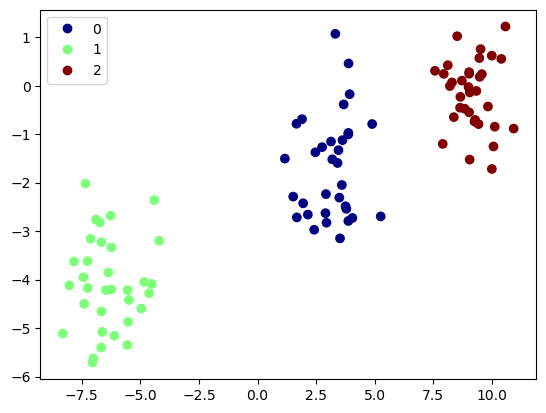

In [77]:
import matplotlib.pyplot as plt
scatter = plt.scatter(X[:, 0], X[:, 1], cmap='jet', c=y_pred)
plt.legend(*scatter.legend_elements(), loc="upper left")
plt.show()

In [71]:
print(y_pred)
y_pred is kmean.labels_

[0 1 1 0 2 2 1 2 1 2 1 1 1 2 2 2 0 2 1 1 1 2 0 1 1 1 2 2 0 1 1 0 2 2 0 0 2
 0 0 1 2 2 1 1 1 0 2 1 2 2 0 0 2 1 0 1 1 2 2 0 0 0 0 0 0 2 0 2 1 1 0 1 2 1
 2 2 1 0 2 1 0 1 0 0 2 1 0 2 1 2 2 0 1 0 2 2 0 0 0 0]


True

In [72]:
kmean.cluster_centers_

array([[ 3.14871914, -1.68578255],
       [-6.35255475, -4.07465055],
       [ 9.15071247, -0.17276796]])

In [73]:
X_new = np.array([[0, 2], [3,2], [-3,-3], [-10,-2.5]])
kmean.predict(X_new)

array([0, 0, 1, 1])

In [74]:
kmean.transform(X_new).round(2)

array([[ 4.85,  8.79,  9.41],
       [ 3.69, 11.15,  6.52],
       [ 6.29,  3.52, 12.48],
       [13.17,  3.97, 19.29]])

## Kmeans decision making ##

Kmeans creates centroids based on number of centers given and then based of the point and the distance it is from a centroid it makes the "classification"

In [75]:
kmean.inertia_

169.17362215565566

c:\Users\travi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


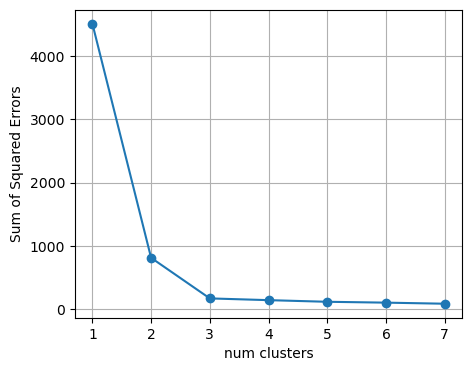

In [76]:
errors = []

for i in range(1,8):
    num_cluster_checker = KMeans(n_clusters=i)
    
    num_cluster_checker.fit(X)
    
    errors.append(num_cluster_checker.inertia_)

plt.figure(figsize=(5,4))    
plt.plot(range(1,8), errors, marker='o')
plt.xlabel("num clusters")
plt.ylabel("Sum of Squared Errors")
plt.grid(True)
plt.show()

In [78]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmean.labels_)

0.7678353626955637

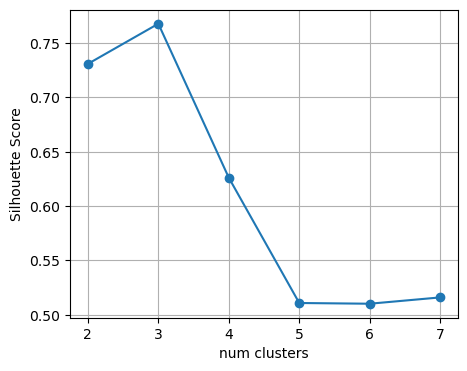

In [83]:
errors = []

for i in range(2,8):
    num_cluster_checker = KMeans(n_clusters=i)
    
    num_cluster_checker.fit(X)
    
    errors.append(silhouette_score(X, num_cluster_checker.labels_))

plt.figure(figsize=(5,4))    
plt.plot(range(2,8), errors, marker='o')
plt.xlabel("num clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()